In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Exercise 2, part A : Dataset pre-processing

### Parkisons Dataset

In [5]:
### Load the data into pandas Dataframe

park_df = pd.read_csv("datasets/parkinsons_updrs.data", sep=",", header='infer')

In [6]:
park_df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


#### Convert non-numeric types to numeric
There are no non-numeric types

In [7]:
cat_columns = park_df.select_dtypes(['object']).columns
cat_columns

Index([], dtype='object')

In [8]:
park_df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


#### Drop rows with missing values
No missing values found

In [11]:
park_df.isnull().any(axis=0).sum()

0

Plotting correlation between columns to find relevant columns.

<AxesSubplot:>

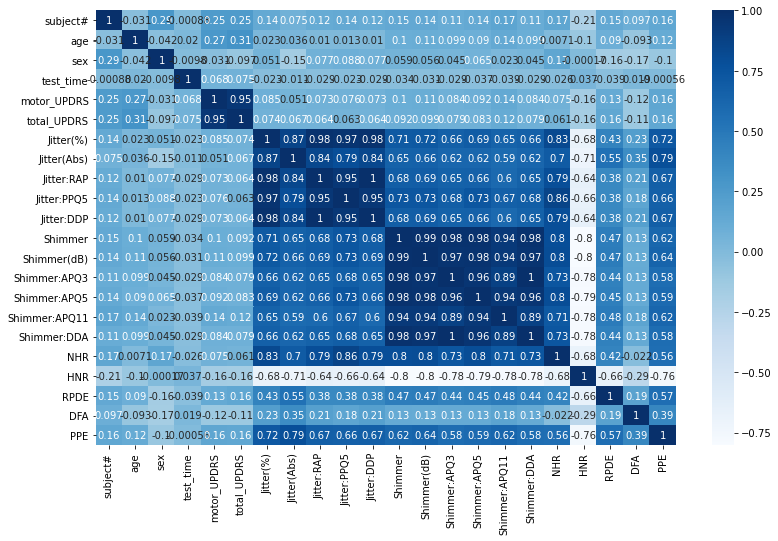

In [12]:
plt.figure(figsize=(13, 8))
sns.heatmap(park_df.corr(), annot=True, cmap='Blues')

#### Dropping irrelevant columns

Columns are selected based on their correlation with the target. THe columns with "jitter*" term are highly correlated with each other, therefore taking one of them is enough. Similarly, one of the columns with "shimmer*" term is picked.

In [16]:
park_df = park_df[['subject#', 'age','motor_UPDRS','Jitter(%)','Shimmer:APQ11', 'RPDE','PPE','total_UPDRS']]
park_df

,subject#,age,motor_UPDRS,Jitter(%),Shimmer:APQ11,RPDE,PPE,total_UPDRS
0,1,72,28.199,0.00662,0.01662,0.41888,0.16006,34.398
1,1,72,28.447,0.00300,0.01689,0.43493,0.10810,34.894
2,1,72,28.695,0.00481,0.01458,0.46222,0.21014,35.389
3,1,72,28.905,0.00528,0.01963,0.48730,0.33277,35.810
4,1,72,29.187,0.00335,0.01819,0.47188,0.19361,36.375
...,...,...,...,...,...,...,...,...
5870,42,61,22.485,0.00406,0.01549,0.64215,0.21367,33.485
5871,42,61,21.988,0.00297,0.01904,0.52598,0.12621,32.988
5872,42,61,21.495,0.00349,0.01877,0.47792,0.14157,32.495
5873,42,61,21.007,0.00281,0.01307,0.56865,0.14204,32.007


#### Split dataset into train and test

In [23]:
train, test = train_test_split(park_df, test_size=0.2, random_state=42, shuffle=True)

In [24]:
train = train.reset_index()
test = test.reset_index()

## Exercise 2, part B: Linear Regression with Gradient Descent

In [25]:
## Creating train_x, train_y, test_x and test_y

train_y = train['total_UPDRS']
train_x = train.drop(columns=['total_UPDRS'])

test_y = test['total_UPDRS']
test_x = test.drop(columns=['total_UPDRS'])

**Normalize X, so that every attribute is at the same scale.**

In [26]:
## Mean Normalization of the data
scaler = MinMaxScaler()
train_x = pd.DataFrame(scaler.fit_transform(train_x),
            columns=train_x.columns, index=train_x.index) 

test_x = pd.DataFrame(scaler.fit_transform(test_x),
            columns=test_x.columns, index=test_x.index) 

**Prepare X and Y for the linear regression**

In [27]:
X = train_x.to_numpy()
Y = train_y.to_numpy()

Y = np.atleast_2d(Y).T

X_test = test_x.to_numpy()
Y_test = test_y.to_numpy()

Y_test = np.atleast_2d(Y_test).T

In [28]:
X = np.hstack((np.atleast_2d(np.ones(len(X))).T, X))
X_test = np.hstack((np.atleast_2d(np.ones(len(X_test))).T, X_test))

**Implementation of Linear regression with Gradient Descent**

In [79]:
def learn_linear_reg_GD(X,Y,X_test, Y_test, params,alpha,imax):
    '''
    Objective is to minimize the loss.
    This function implements linear regression and learns parameters through application of Gradient Descent on loss
    '''
    # Track the path of loss values, plot these values in the end
    train_diffs = []
    test_losses = []
    
    Y_hat = np.matmul(X,params)
    prev_train_loss = np.sum(np.square(Y - Y_hat))
    
    for i in range(imax):
        # Predict Y for train and test
        Y_hat = np.matmul(X,params)
        Y_hat_test = np.matmul(X_test,params)
        
        
        # Updating params by applying negative gradient
        gradient = -2*(np.matmul(X.T, (Y - Y_hat)))
        params = params - ((alpha)*gradient)
        
        # Predict Y for train and test, updates params
        Y_hat = np.matmul(X,params)
        Y_hat_test = np.matmul(X_test,params)
        
        # Calculate absolute difference between previous loss and current loss
        train_loss = np.sum(np.square(Y - Y_hat))
        diff = np.abs(train_loss - prev_train_loss)
        train_diffs.append(diff)
        
        prev_train_loss = train_loss
        
        # Calculate RMSE on test set
        test_rmse = np.sqrt((np.sum(np.square(Y_test - Y_hat_test)))/len(X_test))
        test_losses.append(test_rmse)
        
    print("final rmse value: ", test_rmse)
    return (train_diffs, test_losses)

**Initialize the hyperparameters**

In [75]:
# length of parameter vector
num_param = len(X[0])

# initializing parameter vector
params = np.zeros((num_param,1))

# Intializing steplength: alpha
alpha = 0.000088

# Initializing imax
imax = 200

In [76]:
(train_diffs, test_losses) = learn_linear_reg_GD(X,Y,X_test, Y_test, params,alpha,imax)

#### Plotting difference of train losses and rmse on test set

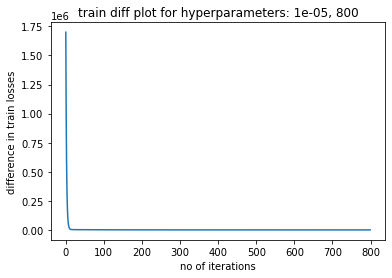

In [46]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

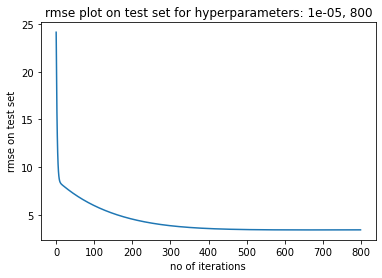

In [47]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

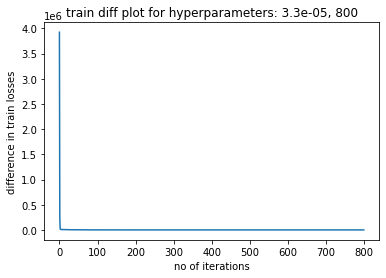

In [53]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

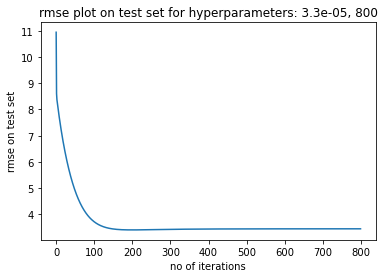

In [54]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

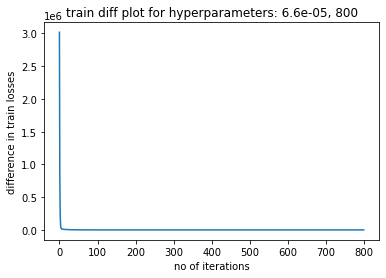

In [57]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

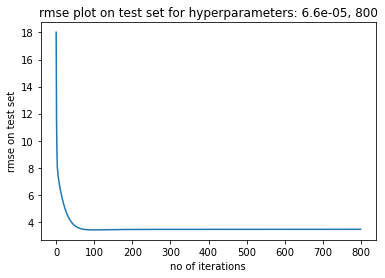

In [58]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

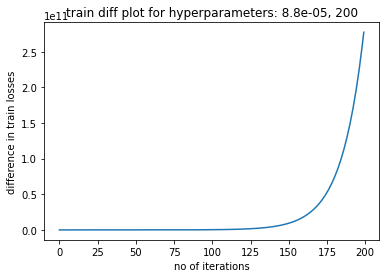

In [78]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

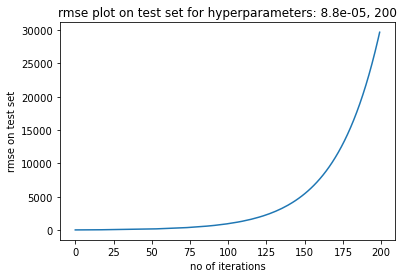

In [77]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

#### Explanation of graphs:
1. The steplength (alpha) has been tried for: [0.00001, 0.000033, 0.000066, 0.000088]
2. imax has been varied for :[100,200,500,1000]
3. **Observations: alpha=0.00001 is very small and hence results in slow convergence.**

4. **alphas=[0.000033 and 0.000066] are more optimal. alpha = [0.000088] is higher than required, hence it doesn't provide convergence.**
5. The difference between losses becomes small with every iteration because loss function starts to become flat when approaching its minima. (--> gradient becomes smaller and hence update in params is also smaller)
6. RMSE in test set is decreasing with every iteration that means model is learning.

## Exercise 3: Steplength control for gradient descent

#### Implementation  of steplength-bolddriver algorithm

Explanation : When the loss value increases from the last iteration, then decrease steplength by 50%. If loss value 
decreases from the last iteration, then increase steplength by 5%. Starting value of steplength is taken as 1.

In [81]:
def linear_reg_bolddriver(X,Y,X_test, Y_test, params,alpha,imax):
    '''
    Implementation of steplength bolddriver for gradient descent
    '''
    
    # Track the path of loss values, plot these values in the end
    train_diffs = []
    test_losses = []
    track_alpha = [alpha]
    
    Y_hat = np.matmul(X,params)
    prev_train_loss = np.sum(np.square(Y - Y_hat))
    
    for i in range(imax):
        # Predict Y for train
        Y_hat = np.matmul(X,params)
        
        
        # Updating params by applying negative gradient
        gradient = -2*(np.matmul(X.T, (Y - Y_hat)))
        params = params - ((alpha)*gradient)
        
        # Predict Y for train and test, after updated params
        Y_hat = np.matmul(X,params)
        Y_hat_test = np.matmul(X_test,params)
        
        # Calculate absolute difference between previous loss and current loss
        train_loss = np.sum(np.square(Y - Y_hat))
        diff = np.abs(train_loss - prev_train_loss)
        train_diffs.append(diff)
        
        # BOLDDRIVER LOGIC : ADAPTING ALPHA According to the loss value
        if(train_loss > prev_train_loss):
            alpha = alpha/2
        else:
            alpha = alpha*1.05
        
        prev_train_loss = train_loss
        track_alpha.append(alpha)
        
        # Calculate RMSE on test set
        test_rmse = np.sqrt((np.sum(np.square(Y_test - Y_hat_test)))/len(X_test))
        test_losses.append(test_rmse)
        
    print("test RMSE final (Bolddriver algorithm):", test_rmse)   
    return (train_diffs, test_losses, track_alpha)

In [82]:
# length of parameter vector
num_param = len(X[0])

# initializing parameter vector
params = np.ones((num_param,1))

# Intializing steplength: alpha, ## Initial value of alpha = 1
alpha = 1

# Initializing imax
imax = 1000

In [83]:
(train_diffs, test_losses, track_alpha) = linear_reg_bolddriver(X,Y,X_test, Y_test, params,alpha,imax) 

test RMSE final (Bolddriver algorithm): 3.679174744755333e+16


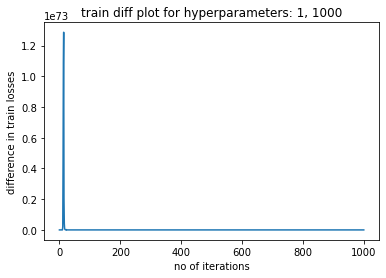

In [84]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

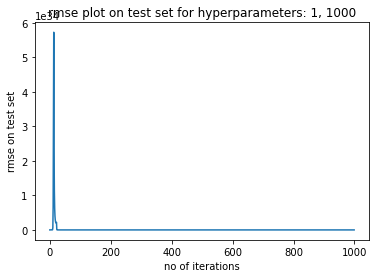

In [85]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

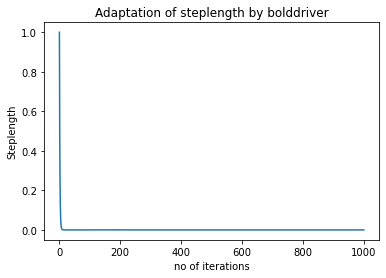

In [86]:
plt.plot(track_alpha)
plt.xlabel("no of iterations")
plt.ylabel("Steplength")
plt.title("Adaptation of steplength by bolddriver")
plt.show()

**Adaptations of steplength by bolddriver algorithm shown below:**

In [87]:
track_alpha

[1,
 0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125,
 0.000244140625,
 0.0001220703125,
 6.103515625e-05,
 6.40869140625e-05,
 6.7291259765625e-05,
 7.065582275390626e-05,
 7.418861389160158e-05,
 7.789804458618166e-05,
 8.179294681549075e-05,
 8.588259415626529e-05,
 9.017672386407855e-05,
 4.508836193203928e-05,
 4.734278002864124e-05,
 4.9709919030073304e-05,
 5.219541498157697e-05,
 5.4805185730655825e-05,
 5.754544501718862e-05,
 6.0422717268048055e-05,
 6.344385313145046e-05,
 6.661604578802299e-05,
 6.994684807742415e-05,
 7.344419048129535e-05,
 7.711640000536012e-05,
 8.097222000562813e-05,
 8.502083100590955e-05,
 8.927187255620503e-05,
 4.4635936278102515e-05,
 4.686773309200764e-05,
 4.921111974660803e-05,
 5.167167573393843e-05,
 5.425525952063535e-05,
 5.696802249666712e-05,
 5.981642362150048e-05,
 6.28072448025755e-05,
 6.594760704270428e-05,
 6.92449873948395e-05,
 7.270723676458149e-05,
 7.6342598

#### Implementation of the steplength-backtracking algorithm

In [88]:
def backtracking_linesearch(X,Y,beta,alpha,params):
    '''
    Implementation of the stepsize-backtracking algorithm
    Beta is the reducing factor, which decreases alpha
    '''
    track_alpha = [alpha]
    
    # Predict Y for train
    Y_hat = np.matmul(X,params)

    # calculating gradient
    gradient = -2*(np.matmul(X.T, (Y - Y_hat)))
    gradient_2 = np.square(gradient)

    params_new = params - alpha*(gradient)
    Y_hat_new = np.matmul(X,params_new)
    lhs = np.sum(np.square(Y - Y_hat_new))
    
    rhs = (np.sum(np.square(Y - Y_hat))) - (alpha/2)*np.sum(gradient_2)
    
    while(lhs > rhs):
        alpha = alpha*beta
        track_alpha.append(alpha)
        
        params_new = params - alpha*(gradient)
        Y_hat_new = np.matmul(X,params_new)
        lhs = np.sum(np.square(Y - Y_hat_new))

        rhs = (np.sum(np.square(Y - Y_hat))) - (alpha/2)*np.sum(gradient_2)

    return (alpha,track_alpha)


In [89]:
# Initialize hyper-parameter for backtracking line search

beta = 0.508
alpha = 1
imax = 500

(alpha,track_alpha) = backtracking_linesearch(X,Y,beta,alpha,params)

In [90]:
(train_diffs, test_losses) = learn_linear_reg_GD(X,Y,X_test, Y_test, params,alpha,imax)

final rmse value:  3.4512877227233805


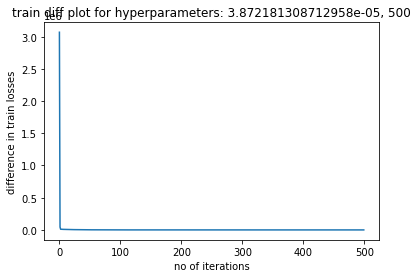

In [91]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

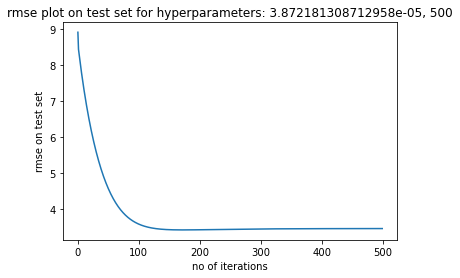

In [92]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

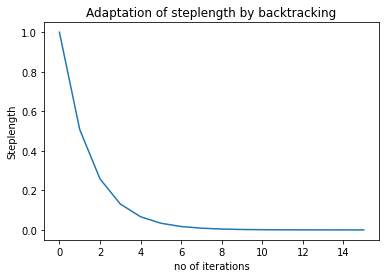

In [93]:
plt.plot(track_alpha)
plt.xlabel("no of iterations")
plt.ylabel("Steplength")
plt.title("Adaptation of steplength by backtracking")
plt.show()

**Adaptation of learning rate in backtracking line search algorithm**

In [94]:
track_alpha

[1,
 0.508,
 0.258064,
 0.131096512,
 0.066597028096,
 0.033831290272768,
 0.017186295458566144,
 0.008730638092951602,
 0.004435164151219414,
 0.0022530633888194623,
 0.001144556201520287,
 0.0005814345503723058,
 0.0002953687515891314,
 0.00015004732580727875,
 7.62240415100976e-05,
 3.872181308712958e-05]

#### Implementation of look-ahead optimizer algorithm

This algorithm maintains slow weights and fast weights.
After every K iterations, slow weights are synchronized with fast weights. 

In [95]:
def look_ahead_optimizer(X,Y,K,alpha,beta,params):
    '''
    Implementation of Lookahead optimizer
    beta is used for updating fast weights
    alpha is used for updating slow weights
    '''
    # Track the path of loss values, plot these values in the end
    train_diffs = []
    test_losses = []
    
    Y_hat = np.matmul(X,params)
    prev_train_loss = np.sum(np.square(Y - Y_hat))
    
    fast_params = np.ones(len(X[0]))
    
    for i in range(imax):
        ## Synchronize params
        fast_params = np.array(params)
        
        ## Running k iterations
        for k in range(K):     
            # Predict Y for train
            Y_hat = np.matmul(X,fast_params)


            # Updating params by applying negative gradient
            gradient = -2*(np.matmul(X.T, (Y - Y_hat)))
            fast_params = fast_params - ((beta)*gradient)
        
        # Updating slow weights
        params = params + alpha*(fast_params-params)
        
        # Predict Y for train and test, after updated params
        Y_hat = np.matmul(X,params)
        Y_hat_test = np.matmul(X_test,params)
        
        # Calculate absolute difference between previous loss and current loss
        train_loss = np.sum(np.square(Y - Y_hat))
        diff = np.abs(train_loss - prev_train_loss)
        train_diffs.append(diff)
        
        
        # Calculate RMSE on test set
        test_rmse = np.sqrt((np.sum(np.square(Y_test - Y_hat_test)))/len(X_test))
        test_losses.append(test_rmse)
        
    print("Final rmse value for lookahead:", test_rmse)
    return (train_diffs, test_losses)

In [97]:
# length of parameter vector
num_param = len(X[0])

# initializing parameter vector
params = np.ones((num_param,1))

imax = 400
alpha = 0.000022
beta = 0.000033
K = 10

(train_diffs, test_losses) = look_ahead_optimizer(X,Y,K,alpha,beta,params)

Final rmse value for lookahead: 26.58023581039062


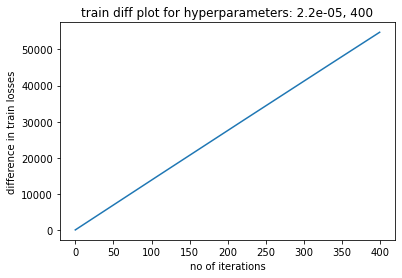

In [98]:
plt.plot(train_diffs)
plt.xlabel("no of iterations")
plt.ylabel("difference in train losses")
plt.title("train diff plot for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

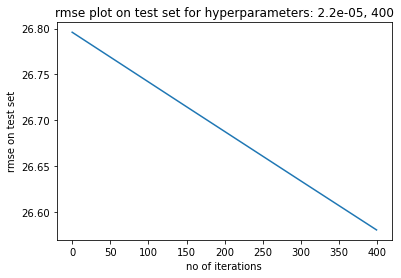

In [99]:
plt.plot(test_losses)
plt.xlabel("no of iterations")
plt.ylabel("rmse on test set")
plt.title("rmse plot on test set for hyperparameters: "+str(alpha)+", "+str(imax))
plt.show()

### Comparison of step-controller algorithms:

| Algorithm         | RMSE     | 
|--------------|-----------|
| Bolddriver | 3.679174744755333e+16      |
| Backtracking line search      | 3.451  | 
| Lookahead optimizer      | 26.580  | 

**RMSE values on test set shows that backtracking line search wins as a step length controller.** Bolddriver has not performed well on any of the datasets. Lookahead performs pretty well.